## Task no. 1: *Prediction using unSupervised ML*
# Introduction

In this task we use the infamous iris dataset to try to Classify its data based on five of its features: Sepal Length and width, petal length and width and ofcourse class. We'll not be splitting the data as the task goal is only to determine the optimum number of clusters and represent it visually.
<br>
for this task the K-Means Clustering model in sklearn is chosen and the workflow is as follows:
1. Importing the relevant libraries.
2. Importing the dataset.
3. Preprocessing the dataset.
4. perform K-means Clustering on the dataset.
6. checking Classified inputs graphs.
7. Using the Elbow rule to determine the optimum number of clusters

# Importing the relevant libraries and the Iris dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Iris.csv', index_col=[0])
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking for dataset info: null values, data types and number of rows
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# Preprocessing the dataset

In [4]:
# Creating dummies for the categorical column 'Species'
species_dummies = pd.get_dummies(raw_data['Species'])
# concatenating th dummies with our dataset
raw_data = pd.concat([raw_data, species_dummies], axis= 1)
raw_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1


In [5]:
# dropping the 'Species columns' as there's no use of it in the clustering process
data = raw_data.drop('Species', axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,,,,,
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0


# Prforming the Kmeans Clustering using SKlearn

In [6]:
kmeans = KMeans(3)
kmeans.fit(data)
# Obtaining each cluster predicted for each observation
clusters = kmeans.predict(data)
# adding a new column in the dataset that represent the cluster specified
data['clusters'] = clusters
data.sample(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica,clusters
Id,,,,,,,,
86,6.0,3.4,4.5,1.6,0,1,0,2
68,5.8,2.7,4.1,1.0,0,1,0,2
6,5.4,3.9,1.7,0.4,1,0,0,1
19,5.7,3.8,1.7,0.3,1,0,0,1
75,6.4,2.9,4.3,1.3,0,1,0,2
87,6.7,3.1,4.7,1.5,0,1,0,2
136,7.7,3.0,6.1,2.3,0,0,1,0
5,5.0,3.6,1.4,0.2,1,0,0,1
39,4.4,3.0,1.3,0.2,1,0,0,1


# checking Classified inputs graphs

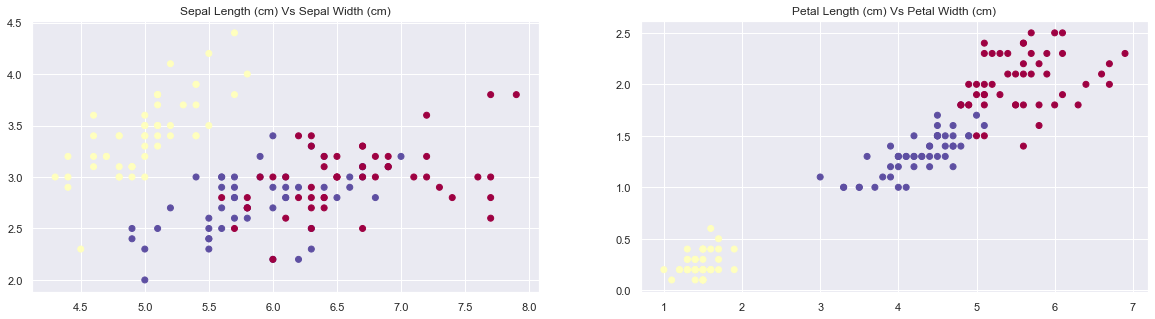

In [7]:


f, (ax1,ax2) = plt.subplots(1,2,sharey=False,figsize =(20,5))
ax1.scatter(data['SepalLengthCm'],data['SepalWidthCm'], c=data['clusters'], cmap="Spectral")
ax1.set_title('Sepal Length (cm) Vs Sepal Width (cm)')

ax2.scatter(data['PetalLengthCm'],data['PetalWidthCm'], c=data['clusters'],cmap="Spectral")
ax2.set_title('Petal Length (cm) Vs Petal Width (cm)')

plt.show()

From the second graph we observe that The petal width and length along with the species type seem to be the higher wight when classifying the dataset

# Using the Elbow rule to determine the optimum number of clusters

c:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


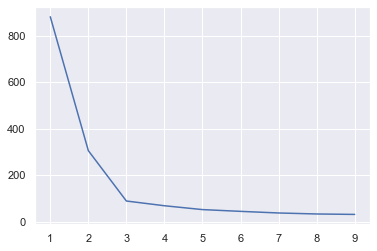

In [13]:

wcss = []
for i in range(1,10):
    # We'll try different number of clusters in the K-Means model and record the WCSS for each attempt
    kmeans = KMeans(i)
    kmeans.fit(data)
    #clusters = kmeans.predict(data)
    wcss.append(kmeans.inertia_)
# We'll Graph each number of clusters selected along with its WCSS to visualize the results
sns.lineplot(x = np.arange(1,10),y = wcss)
plt.show()

From the above graph we can conclude that the optimum number of clusters is 3 based on the Elbow rule where no further significant improvement can be obtained in Within cluster sum of squares (WCSS) in higher number of clusters